In [1]:
#pip install -U seaborn

In [2]:
import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

import seaborn as sns

import pylab as plot

from scipy import stats

In [3]:
data = pd.read_csv(r"C:\Users\johnl\Documents\House Price Data\train.csv")
test_data =  pd.read_csv(r"C:\Users\johnl\Documents\House Price Data\test.csv")
#overview of data 
print(data.shape)
#rows = 891
#cols = 12
# view our data format
data.head(5)
test_ID = test_data['Id']

(1460, 81)


In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Missing Values
##### LotFrontage = 259
##### MasVnrArea = 8
##### GarageYrBit = 81

For now we will replace LotFrontage with the median

In [5]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())


C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SalePrice distribution')

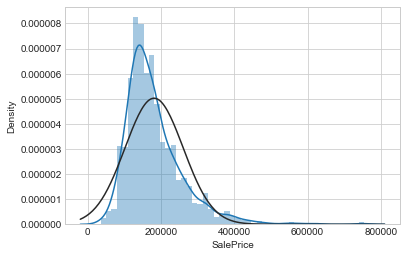

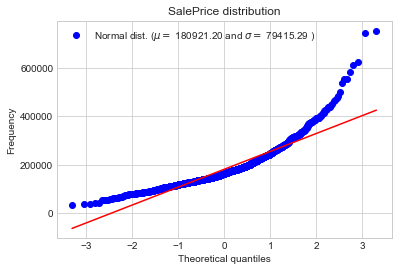

In [6]:

(mu, sigma) =stats.norm.fit(data['SalePrice'])
sns.distplot(data['SalePrice'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


Graph analysis <br>
-Right skew <br>
-Peaked graph

In [7]:
print("Skewness: " + str(data['SalePrice'].skew()))
print("Kurtosis: " + str(data['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


#### What do these values mean?
##### Rules of Thumb for Skewness
1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
2. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
3. If the skewness is less than -1 or greater than 1, the data are highly skewed

As our value is 1.88 we see the data has a high positive skew

##### What is Kurtosis?
- The kurtosis parameter is a measure of the combined weight of the tails relative to the rest of the distribution.
- Kurtosis is all about the tails of the distribution – not the peakedness or flatness.  It measures the tail-heaviness of the distribution.

Kurtosis is usually measured against the normal distribution.  
- If the kurtosis is close to 0, then a normal distribution is often assumed.  These are called mesokurtic distributions.
- If the kurtosis is less than zero, then the distribution is light tails and is called a platykurtic distribution.  
- If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution

The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). George, D., & Mallery, M. (2010). 

# Data Visualization and Exploration

### Sale Price relationship with numerical values

##### 1. Sale Price relationship with GrLivArea (Above grade (ground) living area square feet)

Text(0.5, 0, 'GrLivArea')

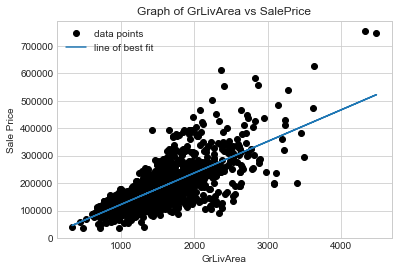

In [8]:
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
x = data['GrLivArea']
y =  data['SalePrice']
plt.plot(x, y,"o", color = "black")
#sns.regplot(data = data,x='GrLivArea', y='SalePrice')
m, b = np.polyfit(x, y, 1)
#m = slope, b=intercept
plt.plot(x, m*x + b)
plt.title("Graph of GrLivArea vs SalePrice")
plt.legend(["data points", "line of best fit"])
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')


#### Plot Analysis
- The data shows an uphill pattern as you move from left to right, this indicates a positive relationship between GrLivArea and SalesPrice. As the GrLivArea increase (move right), the SalePrice tend to increase (move up). 
- This follows common logic as it makes sense the bigger the house the the more the property would cost so there is no suprises here.
- We can see that the data points generally follow our line of best fit which implies that there is a linear relationship here
- There seems to be 2 extreme outliers on the bottom right, really large houses that sold for really cheap. (can safely remove)

Text(0.5, 0, 'GrLivArea')

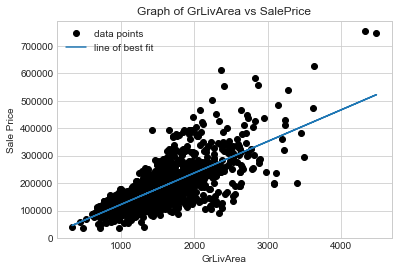

In [9]:
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)


x = data['GrLivArea']
y =  data['SalePrice']
plt.plot(x, y,"o", color = "black")
#sns.regplot(data = data,x='GrLivArea', y='SalePrice')
m, b = np.polyfit(x, y, 1)
#m = slope, b=intercept
plt.plot(x, m*x + b)
plt.title("Graph of GrLivArea vs SalePrice")
plt.legend(["data points", "line of best fit"])
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')

##### 2. Sale Price Relationship with TotalBsmtSF: Total square feet of basement area

Text(0.5, 0, 'TotalBsmtSF')

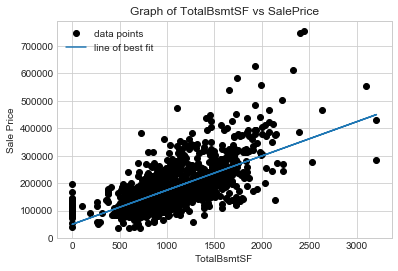

In [10]:
x = data['TotalBsmtSF']
y =  data['SalePrice']
plt.plot(x, y,"o", color = "black")

m, b = np.polyfit(x, y, 1)
#m = slope, b=intercept
plt.plot(x, m*x + b)
plt.title("Graph of TotalBsmtSF vs SalePrice")
plt.legend(["data points", "line of best fit"])
plt.ylabel('Sale Price')
plt.xlabel('TotalBsmtSF')


#### Plot Analysis
- The data shows an uphill pattern as you move from left to right, this indicates a positive relationship between TotalBsmtSF and SalesPrice. As the TotalBsmtSF increase (move right), the SalePrice tend to increase (move up). 
- The data here shows a very strong linear relationship which is bordering on exponential

### Sale Price relationship with categorical values

##### 1. Sale Price relationship with OverallQual: Rates the overall material and finish of the house

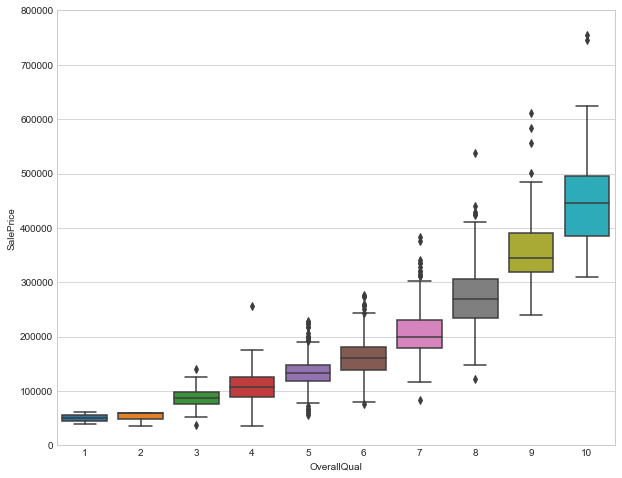

In [11]:
#box plot overallqual/saleprice
x = data['OverallQual']
plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=x, y=y, data=data)
fig.axis(ymin=0, ymax=800000);

#### Plot Analysis
- Very clear and obvious relationship between Overall Quality and Price. 
- Clear strong positive linear relationship between the rating and the price
- Indicates that the higher the quality the more people are willing to pay for the house

##### 2. Sale Price relationship with YearBuilt: Original construction date


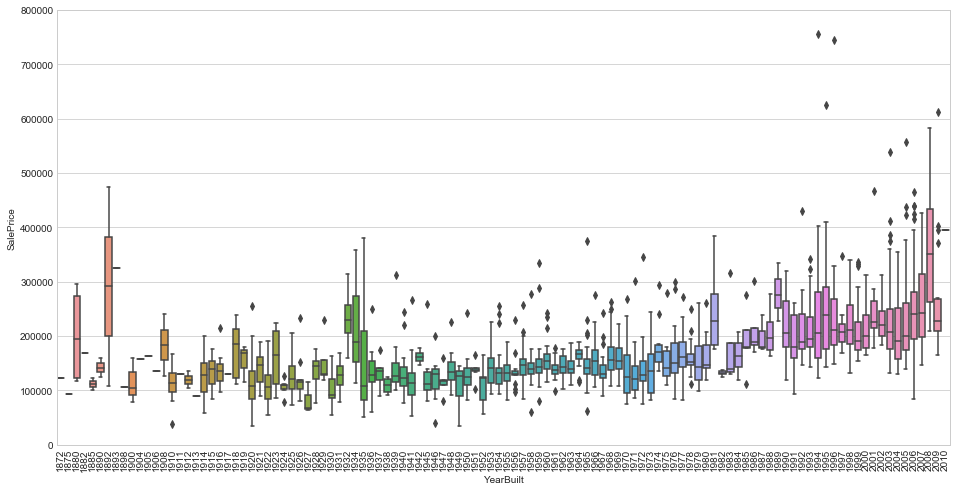

In [12]:
#box plot yearbuilt/saleprice
x = data['YearBuilt']
plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=x, y=y, data=data)
plt.xticks(rotation=90)
fig.axis(ymin=0, ymax=800000);

#### Plot Analysis
- There might be a very weak postive relationship between the year the house was built and the sale price

### Correlation Matrix

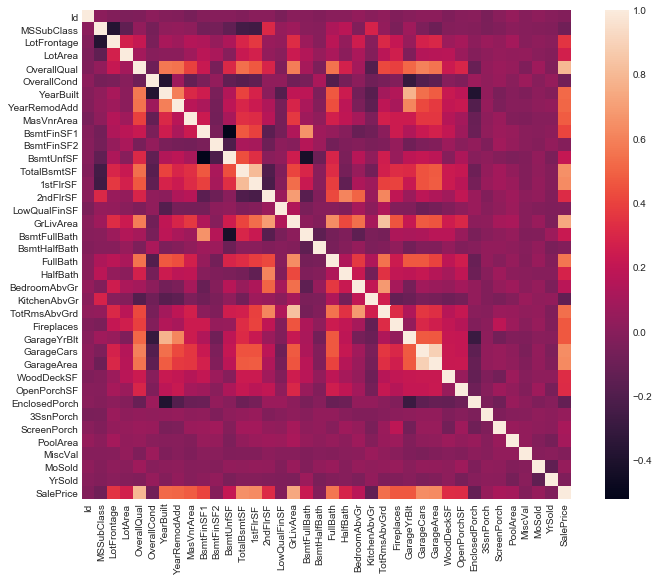

In [13]:
corrmat = data.corr()
corrmat
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

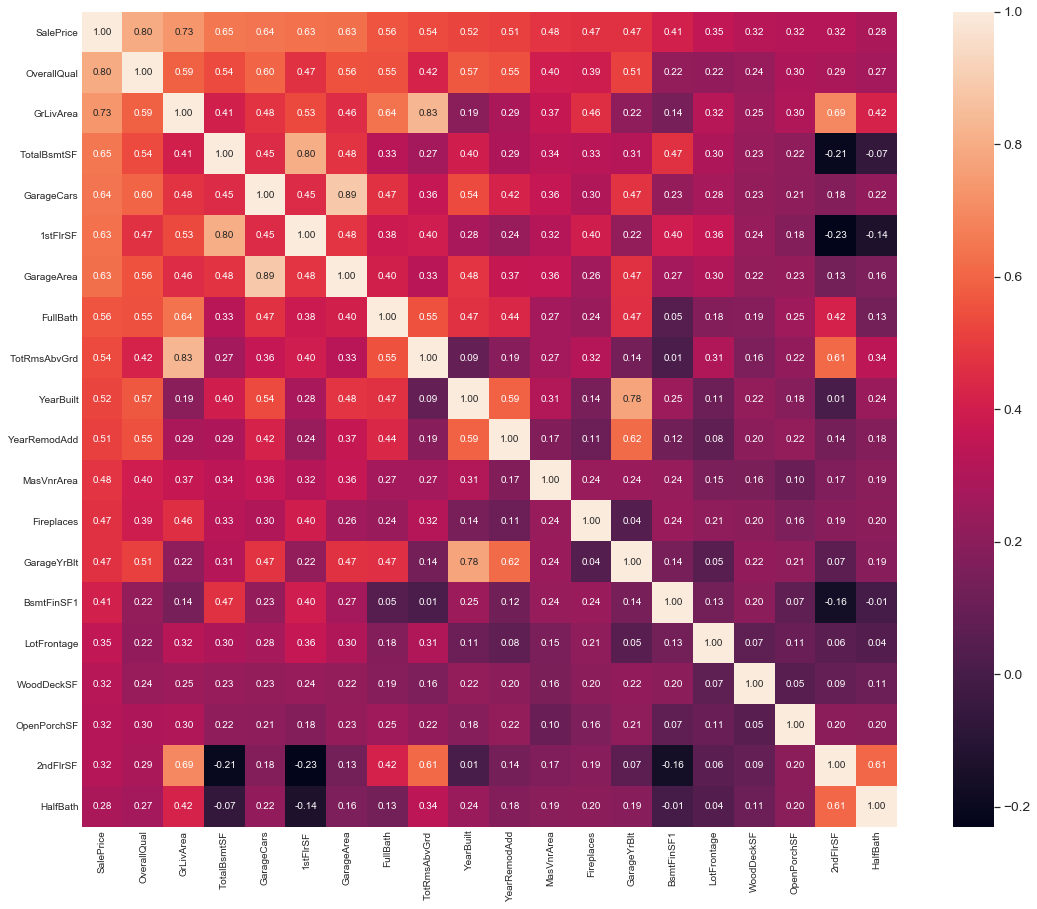

In [14]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
plt.subplots(figsize=(20, 15))
#Return the first n rows ordered by columns in descending order, order by saleprice
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Correlation Matrix Analysis
- OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with SalePrice
- GarageCars and GarageArea are also some of the most strongly correlated variables.
 - suggests a problem with multicollinearity (makes sense as the number of cars will increase with the area)
 - to avoid this we will remove GarageArea as it has less correlation with SalePrice 
- Strong correlation between TotalBsmtSF and 1stFlrSF (we will keep TotalBsmtSF)
- Strong correlation betweenn GrLivArea and TotRmsAbvGrd


## Feature Engineering, Missing data and Target Tranformation

### Main Tasks
- Imputing missing values by proceeding sequentially through the data

- Transforming some numerical variables that seem really categorical

- Label Encoding some categorical variables that may contain information in their ordering set

- Box Cox Transformation of skewed features (instead of log-transformation)

- Getting dummy variables for categorical features.

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


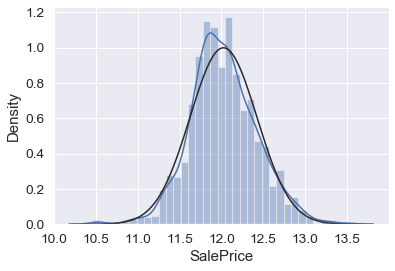

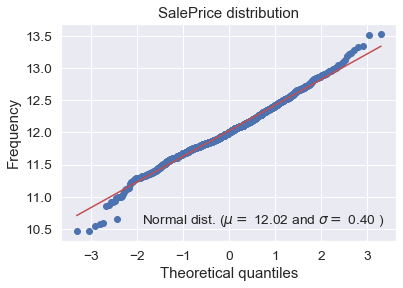

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train = data


train["SalePrice"] = np.log1p(train["SalePrice"])
(mu, sigma) =stats.norm.fit(train['SalePrice'])
sns.distplot(train['SalePrice'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
y_train = train.SalePrice.values

In [16]:

def get_combined_data():

    test =  pd.read_csv(r"C:\Users\johnl\Documents\House Price Data\test.csv")
    # extract and remove the target from the training data
    targets = train.SalePrice # survived is a column 
    train.drop(["SalePrice"],1,inplace = True) # we want top estimate it so we drop 
    
    #merging train data and test data for feature engineering
    # remove PassengerID as its not useful 
    combined = train.append(test)
    combined.reset_index(inplace = True)
    combined.drop('index', inplace = True, axis = 1)
    return combined
combined = get_combined_data()
print(combined.shape)
combined.head()



(2917, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [17]:
all_data_na = (combined.isnull().sum() / len(combined)) * 100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,7.781968
GarageCond,5.450806
GarageQual,5.450806
GarageFinish,5.450806
GarageType,5.382242


Text(0.5, 1.0, 'Percent missing data by feature')

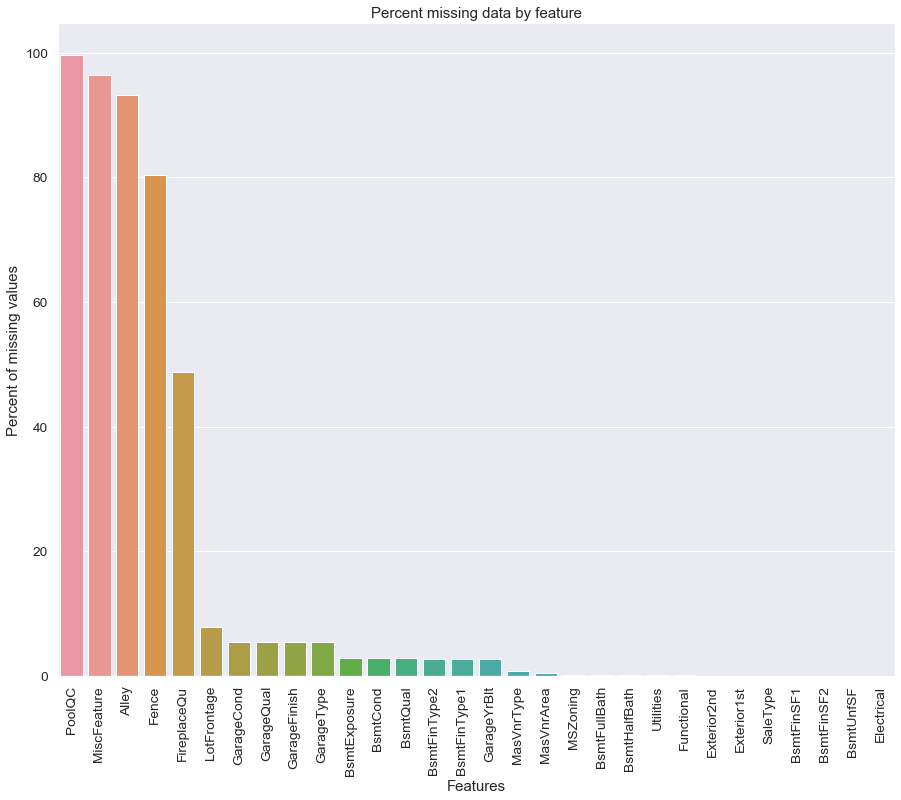

In [18]:
plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Missing Data with NA
i.e all the columns with NA that can be simply

####  PoolQC
- PoolQC : data description says NA means "No Pool". We can fill it with None

In [19]:
combined["PoolQC"] = combined["PoolQC"].fillna("None")

#### MiscFeature
- MiscFeature : data description says NA means "no misc feature". We can fill it with None

In [20]:
combined["MiscFeature"] = combined["MiscFeature"].fillna("None")

#### Alley
- Alley : data description says NA means "no alley access" We can fill it with None

In [21]:
combined["Alley"] = combined["Alley"].fillna("None")

#### Fence
- Fence : data description says NA means "no fence".  We can fill it with None

In [22]:
combined["Fence"] = combined["Fence"].fillna("None")

#### FireplaceQu
- FireplaceQu : data description says NA means "no fireplace". We can fill it with None

In [23]:
combined["FireplaceQu"] = combined["FireplaceQu"].fillna("None")

#### LotFrontage
- LotFrontage: Linear feet of street connected to property
- all property must connect to the street so we cant put in None here, We make the assumption that property in the same neighborhood would have the same LotFrontage, thus we will use the median for each neighborhood

In [24]:
combined["LotFrontage"] = combined.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
combined["LotFrontage"]

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        69.0
8        51.0
9        50.0
10       70.0
11       85.0
12       69.0
13       91.0
14       69.0
15       51.0
16       69.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       69.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
2887     50.0
2888     75.0
2889     69.0
2890     50.0
2891     60.0
2892     41.0
2893     44.0
2894     69.0
2895     65.0
2896     70.0
2897    140.0
2898     79.0
2899     79.0
2900     95.0
2901     88.0
2902    125.0
2903     78.0
2904     41.0
2905     58.0
2906     70.0
2907     21.0
2908     21.0
2909     80.0
2910     21.0
2911     21.0
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: float64

#### Garage (Catagorical)
NA means there is no garage, as these are catagorical we will insert None for NA values
- GarageType 
- GarageFinish
- GarageQual
- GarageCond

In [25]:
combined["GarageType"] = combined["GarageType"].fillna("None")
combined["GarageFinish"] = combined["GarageFinish"].fillna("None")
combined["GarageQual"] = combined["GarageQual"].fillna("None")
combined["GarageCond"] = combined["GarageCond"].fillna("None")

#### Garage (numerical)
NA means there is no garage, as these are numerical we will insert 0 for NA values
- GarageYrBlt
- GarageArea
- GarageCars

In [26]:
combined["GarageYrBlt"] = combined["GarageYrBlt"].fillna(0)
combined["GarageArea"] = combined["GarageArea"].fillna(0)
combined["GarageCars"] = combined["GarageCars"].fillna(0)

#### Bsmt (numerical)
For these numerical Basement features, we will insert 0 as we are assuminng the property has no basement
- BsmtFinSF1
- BsmtFinSF2 
- BsmtUnfSF 
- TotalBsmtSF 
- BsmtFullBath 
- BsmtHalfBath

In [27]:
combined["BsmtFinSF1"] = combined["BsmtFinSF1"].fillna(0)
combined["BsmtFinSF2"] = combined["BsmtFinSF2"].fillna(0)
combined["BsmtUnfSF"] = combined["BsmtUnfSF"].fillna(0)
combined["TotalBsmtSF"] = combined["TotalBsmtSF"].fillna(0)
combined["BsmtFullBath"] = combined["BsmtFullBath"].fillna(0)
combined["BsmtHalfBath"] = combined["BsmtHalfBath"].fillna(0)



#### Bsmt (catagorical)
For these catagorical Basement features, we will insert None  as we are assuminng the property has no basement
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2

In [28]:
combined["BsmtQual"] = combined["BsmtQual"].fillna("None")
combined["BsmtCond"] = combined["BsmtCond"].fillna("None")
combined["BsmtExposure"] = combined["BsmtExposure"].fillna("None")
combined["BsmtFinType1"] = combined["BsmtFinType1"].fillna("None")
combined["BsmtFinType2"] = combined["BsmtFinType2"].fillna("None")

#### MasVnrArea
- MasVnrArea: Masonry veneer area in square feet
- NA means there is no Masonry veneer thus the area is 0 


In [29]:
combined["MasVnrArea"] = combined["MasVnrArea"].fillna(0)

####  MasVnrType 
- MasVnrType: Masonry veneer type
- NA means there is no Masonry veneer thus the type is None 

In [30]:
combined["MasVnrType"] = combined["MasVnrType"].fillna("None")

#### MSZoning
MSZoning: Identifies the general zoning classification of the sale. <br>
All property must be in a zone classifcation<br>
We will replace the null values with the mode of the neighborhood as it would make sense that a neighborhood would have the same or similar zoning

In [31]:
combined["MSZoning"] = combined.groupby("Neighborhood")["MSZoning"].transform(lambda x: x.fillna(x.mode()))
combined['MSZoning'] = combined['MSZoning'].fillna(combined['MSZoning'].mode()[0])

#### Utilities 
- For this catgorical variable basically all the values are the same so we can just remove it as it will not add to our model

In [32]:
combined = combined.drop(['Utilities'], axis=1)

#### Functional 
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Assume null values are typical

In [33]:
combined["Functional"] = combined["Functional"].fillna("Typ")

#### Electrical
- It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [34]:
combined['Electrical'] = combined['Electrical'].fillna(combined['Electrical'].mode()[0])

#### KitchenQual
- Only one NA value, fill with most frequent

In [35]:
combined['KitchenQual'] = combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0])

#### Exterior1st and Exterior2nd
- Only 1 NA value, fill with most frequent

In [36]:
combined['Exterior1st'] = combined['Exterior1st'].fillna(combined['Exterior1st'].mode()[0])
combined['Exterior2nd'] = combined['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0])

#### SaleType
- Fill with frequent

In [37]:
combined['SaleType'] = combined['SaleType'].fillna(combined['SaleType'].mode()[0])

#### MSSubClass
- NA probably means no class so fill with None

In [38]:
combined["MSSubClass"] = combined["MSSubClass"].fillna("None")

In [39]:
#Check remaining missing values if any 
all_data_na = (combined.isnull().sum() / len(combined)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [40]:
combined.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal
7,8,60,RL,69.0,10382,Pave,None,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,

### Catagorical features as ordered numbers

In [41]:
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

### Some numerical features are actually categories

In [42]:
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

### Adding Features

#### Total Square Footage
Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [43]:
combined['TotalSF'] = combined['TotalBsmtSF'] + combined['1stFlrSF'] + combined['2ndFlrSF']


### Transforming Skewed Features

In [44]:
# gets numeric features (== gets cat)
numeric_feats = combined.dtypes[combined.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = combined[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


### Box Cox Transformation
An alternative to manually trying a variety of transformations is the Box Cox transformation. For each variable, a Box Cox transformation estimates the value lambda from -5 to 5 that maximizes the normality of the data using the equation below.

- For negative values of lambda, the transformation performs a variant of the reciprocal of the variable. 
- At a lambda of zero, the variable is log transformed
- For positive lambda values, the variable is transformed the power of lambda. 

We can apply “boxcox” to all the skewed variables in the dataframe “df” using Scipy.stats.

In [45]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    combined[feat] += 1
    combined[feat] = boxcox1p(combined[feat], lam)


There are 38 skewed numerical features to Box Cox transform


### Dummy Variables

In [46]:
combined = pd.get_dummies(combined)
print(combined.shape)

(2917, 301)


In [47]:
from sklearn.linear_model import ElasticNet, Lasso,Ridge,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import sys
#!{sys.executable} -m pip install xgboost
#!{sys.executable} -m pip install  lightgbm
import xgboost as xgb
import lightgbm as lgb

In [48]:
train_end = train.shape[0]
def recover_train_test_target():
    global combined
    
    file = pd.read_csv(r"C:\Users\johnl\Documents\House Price Data\train.csv")
    file = file.drop(file[(file['GrLivArea']>4000) & (file['SalePrice']<300000)].index)
    targets = file["SalePrice"].values
    train = combined.iloc[:train_end]
    test = combined.iloc[train_end:]
    
    return train, test, targets

train, test, targets = recover_train_test_target()
len(train.values)

1458

In [49]:
ntrain = train.shape[0]
train = combined[:ntrain]
test = combined[ntrain:]

In [50]:
#K-Folds cross-validator
#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
# Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
# n_folds = number of folds (must be atleast two)
# get_n_splits([X, y, groups]) = Returns the number of splitting iterations in the cross-validator
n_folds = 5
#rmsle = root mean square log error

# model = The object to use to fit the data.
# train.values = The data to fit.
# y_train = the target variable to try to predict in the case of supervised learning.
# cv = kf = Determines the cross-validation splitting strategy. 


def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [51]:
#RobustScaler() = scale features using statistics that are robust to outliers.

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))




Lasso score: 0.1104 (0.0065)



In [52]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha =0.0005, random_state=1))
score_ridge = rmsle_cv(ridge)
print("\nRidge score: {:.4f} ({:.4f})\n".format(score_ridge.mean(), score_ridge.std()))


Ridge score: 0.1262 (0.0116)



In [53]:
elasticNet =make_pipeline(RobustScaler(), ElasticNet(alpha =0.0005, random_state=1))
score_EN = rmsle_cv(elasticNet)
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score_EN.mean(), score_EN.std()))


ElasticNet score: 0.1116 (0.0067)



In [54]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score_KRR = rmsle_cv(elasticNet)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score_KRR.mean(), score_KRR.std()))


KRR score: 0.1116 (0.0067)



In [55]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [56]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [57]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [58]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [59]:
averaged_models = AveragingModels(models = (elasticNet, ridge, lasso, KRR, GBoost))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1097 (0.0074)

